C:\Users\Ganesh Phanindra\AppData\Local\Temp\ipykernel_41744\649936416.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age"].fillna(df["Age"].median(), inplace=True)  # Fill missing age with median
C:\Users\Ganesh Phanindra\AppData\Local\Temp\ipykernel_41744\649936416.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which 

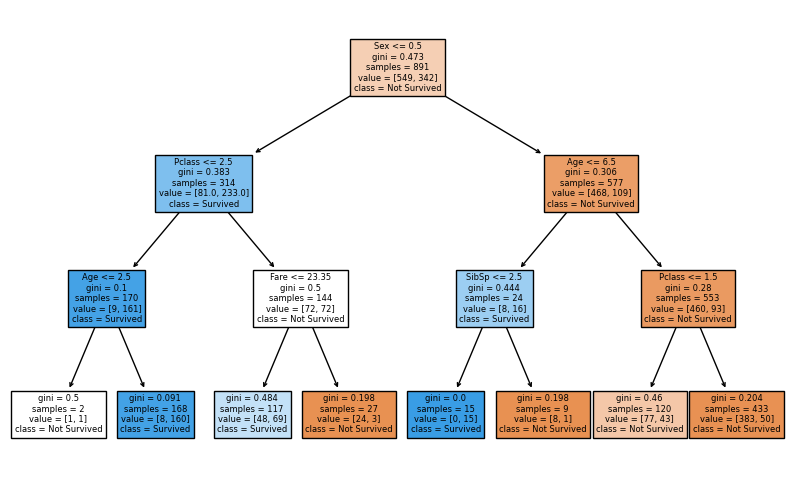

Decision Tree Accuracy: 0.8092
Random Forest Accuracy: 0.8350
Predictions saved to 'submission_decision_tree.csv' and 'submission_random_forest.csv'.
Random Forest performs better than Decision Tree.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# Load the training dataset
train_df = pd.read_csv("train_titanic.csv")

# Load the separate test dataset (without labels)
test_df = pd.read_csv("test_titanic.csv")

# Preprocessing function
def preprocess_data(df, is_train=True):
    df = df.drop(["PassengerId", "Name", "Ticket", "Cabin"], axis=1, errors="ignore")  # Drop unnecessary columns
    df["Age"].fillna(df["Age"].median(), inplace=True)  # Fill missing age with median
    df["Fare"].fillna(df["Fare"].median(), inplace=True)  # Fill missing fare in test data
    df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)  # Fill missing embarked with mode

    # Convert categorical columns into numeric
    df["Sex"] = LabelEncoder().fit_transform(df["Sex"])  # Encode 'Sex' (0 = female, 1 = male)
    df["Embarked"] = LabelEncoder().fit_transform(df["Embarked"])  # Encode 'Embarked'

    if is_train:
        X = df.drop("Survived", axis=1)
        y = df["Survived"]
        return X, y
    else:
        return df  # Return processed test data without labels

# Preprocess training and test data
X_train, y_train = preprocess_data(train_df, is_train=True)
X_test_final = preprocess_data(test_df, is_train=False)  # Preprocess test data (without Survived column)

# Train a Decision Tree model
dt_model = DecisionTreeClassifier(max_depth=3, random_state=42)
dt_model.fit(X_train, y_train)

# Plot the decision tree
plt.figure(figsize=(10, 6))
plot_tree(dt_model, feature_names=X_train.columns, class_names=["Not Survived", "Survived"], filled=True)
plt.show()

# 5-Fold Cross-Validation for Decision Tree
dt_cv_scores = cross_val_score(dt_model, X_train, y_train, cv=5)
print(f"Decision Tree Accuracy: {np.mean(dt_cv_scores):.4f}")

# Train a Random Forest model
rf_model = RandomForestClassifier(n_estimators=200, min_samples_leaf=1, min_samples_split=5, max_depth=None, random_state=42)
rf_model.fit(X_train, y_train)

# 5-Fold Cross-Validation for Random Forest
rf_cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5)
print(f"Random Forest Accuracy: {np.mean(rf_cv_scores):.4f}")

# Predict on separate test dataset
dt_predictions = dt_model.predict(X_test_final)
rf_predictions = rf_model.predict(X_test_final)

# Save predictions to CSV files
submission_dt = pd.DataFrame({"PassengerId": test_df["PassengerId"], "Survived": dt_predictions})
submission_dt.to_csv("submission_decision_tree.csv", index=False)

submission_rf = pd.DataFrame({"PassengerId": test_df["PassengerId"], "Survived": rf_predictions})
submission_rf.to_csv("submission_random_forest.csv", index=False)

print("Predictions saved to 'submission_decision_tree.csv' and 'submission_random_forest.csv'.")

# Comparing the models
if np.mean(rf_cv_scores) > np.mean(dt_cv_scores):
    print("Random Forest performs better than Decision Tree.")
else:
    print("Decision Tree performs better or similar to Random Forest.")
